In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#Importing dataset
data = pd.read_csv('noodles.csv')

In [3]:
#Inspecting top 5 rows
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009


In [4]:
#Checking info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Region     53 non-null     object 
 1   2018               52 non-null     float64
 2   2019               52 non-null     float64
 3   2020               52 non-null     float64
 4   2021               53 non-null     int64  
 5   2022               52 non-null     float64
 6   Rank               53 non-null     int64  
 7   CCA3               53 non-null     object 
 8   Country/Territory  53 non-null     object 
 9   Capital            53 non-null     object 
 10  Continent          53 non-null     object 
 11  2022 Population    53 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 5.1+ KB


We can see some null values in 2018,2019,2020,2022. Filling these with 0's

In [5]:
#Filling Null values with 0

data.fillna(0,inplace=True)

We have 
- data for noodles consumption for 53 countries in Millions of US dollars from 2018 upto 2022
- Population of country/region in 2022
- Rank of country based on the population in 2022

Data is clean without any null values

In [6]:
#Statistical Summary of the Consumption data

data[['2018','2019','2020','2021','2022']].describe()

,2018,2019,2020,2021,2022
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1749.056604,1798.867925,1951.886792,1952.075472,2008.113208
std,5798.209692,5956.814346,6601.082387,6321.729120,6497.477930
min,0.000000,0.000000,0.000000,10.000000,0.000000
25%,50.000000,50.000000,60.000000,60.000000,60.000000
50%,190.000000,210.000000,220.000000,270.000000,240.000000
75%,830.000000,830.000000,870.000000,900.000000,880.000000
max,40250.000000,41450.000000,46360.000000,43990.000000,45070.000000


We can see that the mean Noodles consumption is increasing from 2018 to 2022

We can see that the cosumption is following same pattern every year across the countries with China, Indonesian and India as top 3 Consumers of Instant Noodles

## Feature Engineering - 
1. Year over Year (YoY)
2. Percentage Consumption

In [7]:
# YOY changes

data['YoY_2019'] = round(((data['2019']-data['2018'])/(data['2018']))*100,2)
data['YoY_2020'] = round(((data['2020']-data['2019'])/(data['2019']))*100,2)
data['YoY_2021'] = round(((data['2021']-data['2020'])/(data['2020']))*100,2)
data['YoY_2022'] = round(((data['2022']-data['2021'])/(data['2021']))*100,2)

In [8]:
#Percentage consumption across the years

data['%Consumption_2018'] = round((data['2018']/data['2018'].sum())*100,2)
data['%Consumption_2019'] = round((data['2019']/data['2019'].sum())*100,2)
data['%Consumption_2020'] = round((data['2020']/data['2020'].sum())*100,2)
data['%Consumption_2021'] = round((data['2021']/data['2021'].sum())*100,2)
data['%Consumption_2022'] = round((data['2022']/data['2022'].sum())*100,2)

# Cumulative sum of Percentage consumption
data['%Cum_Consumption_2018'] = data['%Consumption_2018'].cumsum()
data['%Cum_Consumption_2019'] = data['%Consumption_2019'].cumsum()
data['%Cum_Consumption_2020'] = data['%Consumption_2020'].cumsum()
data['%Cum_Consumption_2021'] = data['%Consumption_2021'].cumsum()
data['%Cum_Consumption_2022'] = data['%Consumption_2022'].cumsum()

In [9]:
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,...,%Consumption_2018,%Consumption_2019,%Consumption_2020,%Consumption_2021,%Consumption_2022,%Cum_Consumption_2018,%Cum_Consumption_2019,%Cum_Consumption_2020,%Cum_Consumption_2021,%Cum_Consumption_2022
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,...,43.42,43.48,44.81,42.52,42.35,43.42,43.48,44.81,42.52,42.35
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,...,13.53,13.13,12.22,12.83,13.40,56.95,56.61,57.03,55.35,55.75
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,...,6.54,7.06,6.51,7.31,7.12,63.49,63.67,63.54,62.66,62.87
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,...,6.24,5.91,5.77,5.65,5.62,69.73,69.58,69.31,68.31,68.49
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,...,4.29,4.04,4.32,4.29,4.03,74.02,73.62,73.63,72.60,72.52


## Top & Least Consumers across the years

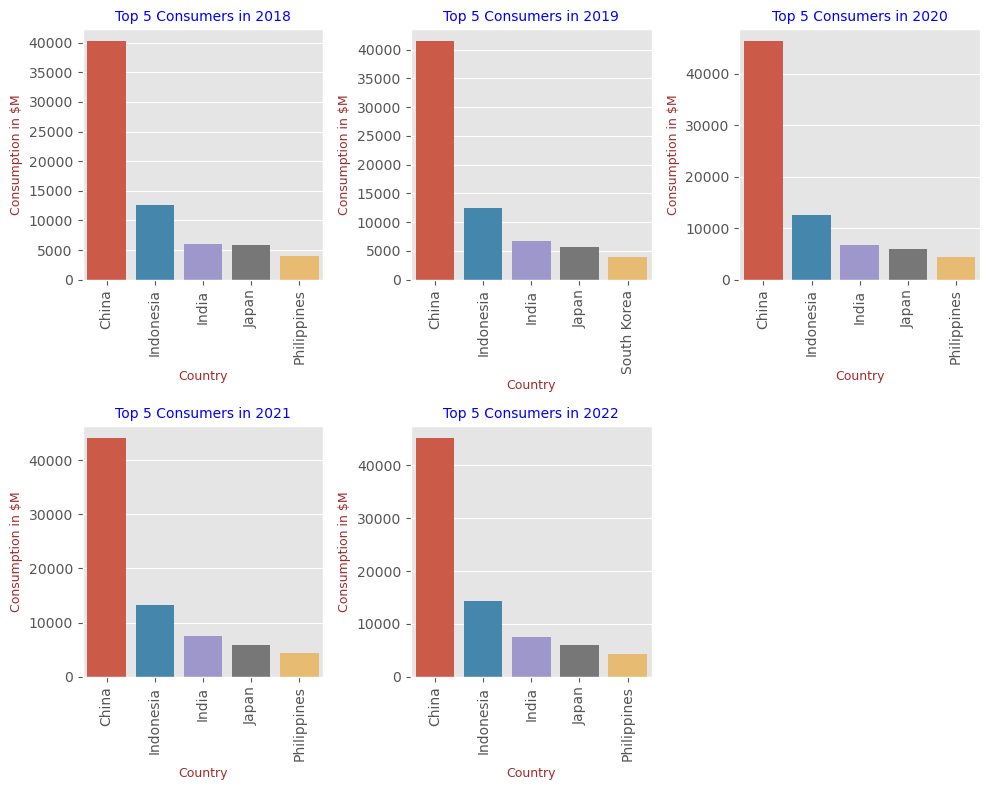

In [10]:
#Top 5 consumers across the years

years = ['2018','2019','2020','2021','2022']

plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df = data.sort_values(yr,ascending=False)[['Country/Region',yr]][:5]
    plt.subplot(2,3,i+1)
    sns.barplot(data=df,x='Country/Region',y=yr)
    plt.title('Top 5 Consumers in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Country',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

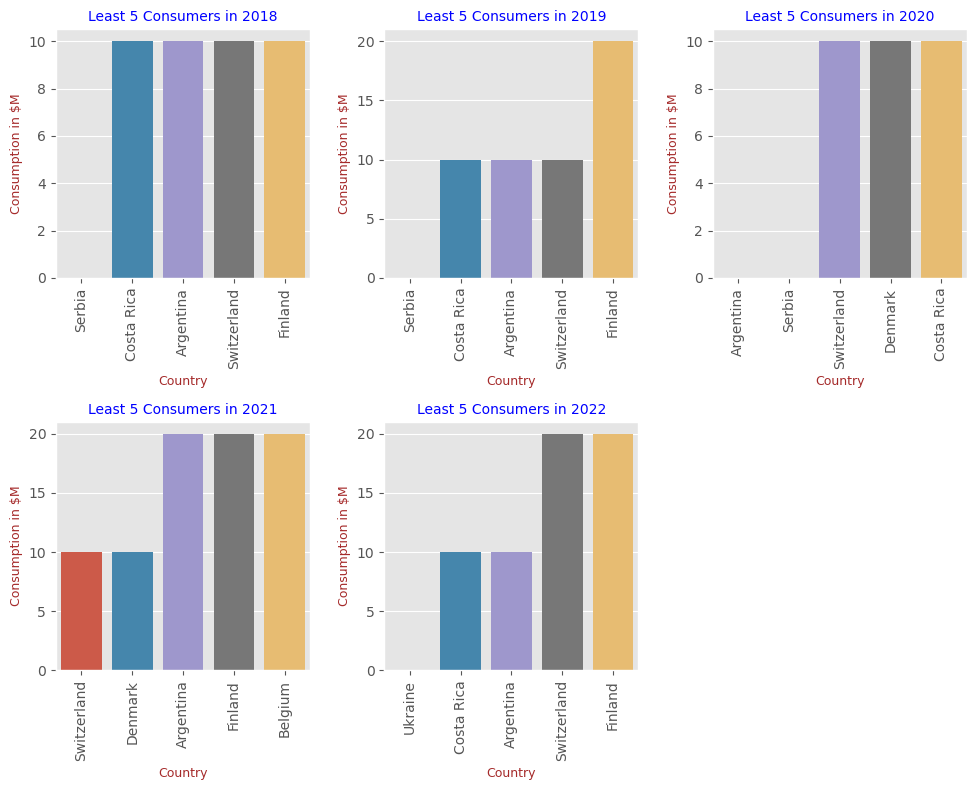

In [11]:
#Least 5 consumers across the years

years = ['2018','2019','2020','2021','2022']

plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df = data.sort_values(yr,ascending=True)[['Country/Region',yr]][:5]
    plt.subplot(2,3,i+1)
    sns.barplot(data=df,x='Country/Region',y=yr)
    plt.title('Least 5 Consumers in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Country',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that China, Indonesia, India, Japan and Philippines continue to be the top 5 consumers of Noodles from 2018 to 2019.
While Argentina, Costa Rica, Switzerland, Denmark are the leat consumers across the years

## Increasing Consumption Growth Rate

We saw the countries which are consuming more noodles in the above. Now let us see the countries which are having continous growth rate from 2018 to 2022

In [12]:
data[(data.YoY_2022 > data.YoY_2021)&(data.YoY_2021 > data.YoY_2020)&(data.YoY_2020 > data.YoY_2019)]

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,...,%Consumption_2018,%Consumption_2019,%Consumption_2020,%Consumption_2021,%Consumption_2022,%Cum_Consumption_2018,%Cum_Consumption_2019,%Cum_Consumption_2020,%Cum_Consumption_2021,%Cum_Consumption_2022
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,...,13.53,13.13,12.22,12.83,13.4,56.95,56.61,57.03,55.35,55.75


We can see that Indonesia, which is occupying 4th rank on the basis of its population in 2022, is the only country which is having a continous growth rate from 2018 to 2022. Now let us see the countries with decreasing consumption growth rate

## Decaying Consumption Growth Rate

In [13]:
data[(data.YoY_2022 < data.YoY_2021)&(data.YoY_2021 < data.YoY_2020)&(data.YoY_2020 < data.YoY_2019)]

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,...,%Consumption_2018,%Consumption_2019,%Consumption_2020,%Consumption_2021,%Consumption_2022,%Cum_Consumption_2018,%Cum_Consumption_2019,%Cum_Consumption_2020,%Cum_Consumption_2021,%Cum_Consumption_2022
25,Guatemala,230.0,250.0,260.0,270,280.0,68,GTM,Guatemala,Guatemala City,...,0.25,0.26,0.25,0.26,0.26,97.78,97.69,97.77,97.55,97.83


We can see that Guatemala is the only country where the growth rate is decreasing over the years

In [14]:
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,...,%Consumption_2018,%Consumption_2019,%Consumption_2020,%Consumption_2021,%Consumption_2022,%Cum_Consumption_2018,%Cum_Consumption_2019,%Cum_Consumption_2020,%Cum_Consumption_2021,%Cum_Consumption_2022
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,...,43.42,43.48,44.81,42.52,42.35,43.42,43.48,44.81,42.52,42.35
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,...,13.53,13.13,12.22,12.83,13.40,56.95,56.61,57.03,55.35,55.75
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,...,6.54,7.06,6.51,7.31,7.12,63.49,63.67,63.54,62.66,62.87
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,...,6.24,5.91,5.77,5.65,5.62,69.73,69.58,69.31,68.31,68.49
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,...,4.29,4.04,4.32,4.29,4.03,74.02,73.62,73.63,72.60,72.52


## Consumption on a continental level

In [15]:
df = data.set_index(['Continent','Country/Region']).sort_values('Continent')

In [16]:
df = df.groupby(['Continent']).sum(numeric_only=True)

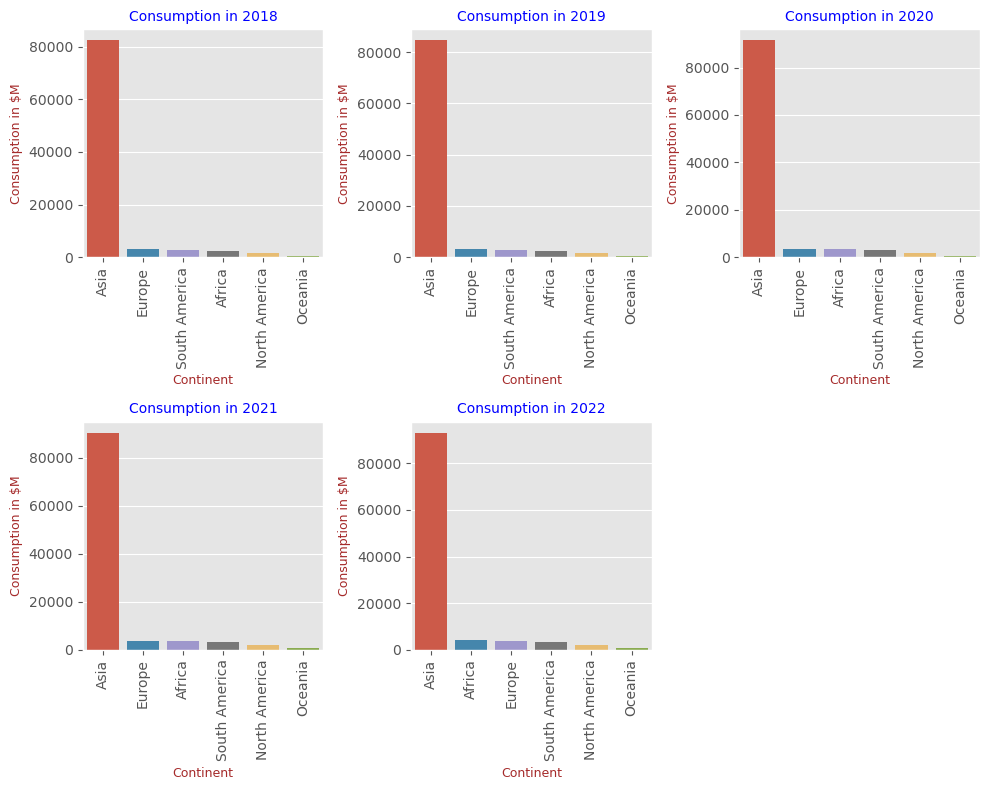

In [17]:
plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df2 = df.sort_values(yr,ascending=False)[yr].reset_index()
    plt.subplot(2,3,i+1)
    sns.barplot(data=df2,x='Continent',y=yr)
    plt.title('Consumption in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Continent',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most world Noodle Consumption is from Asia continent

In [18]:
df1 = df [['%Consumption_2018','%Consumption_2019','%Consumption_2020','%Consumption_2021','%Consumption_2022']]

In [19]:
df1

,%Consumption_2018,%Consumption_2019,%Consumption_2020,%Consumption_2021,%Consumption_2022
Continent,,,,,
Africa,2.62,2.73,3.26,3.55,3.75
Asia,88.89,88.76,88.46,87.54,87.58
Europe,3.46,3.49,3.40,3.64,3.38
North America,1.67,1.70,1.56,1.78,1.88
Oceania,0.53,0.53,0.52,0.52,0.51
South America,2.81,2.77,2.82,3.00,2.94


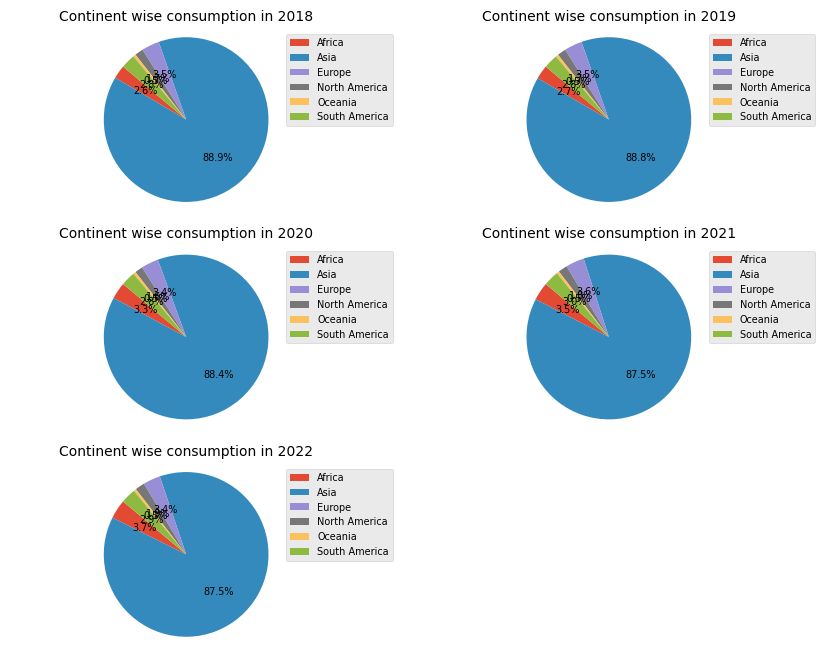

In [20]:
cols = df1.columns.to_list()
labels = 'Continent'

plt.figure(figsize=(10,8))

for i,col in enumerate(cols):
    df2 = df1[col]
    df2 = df2.reset_index()
    plt.subplot(3,2,i+1)
    plt.pie(df2[col], autopct='%1.1f%%', startangle=140,textprops={'fontsize': 7})
    plt.axis('equal')
    plt.title('Continent wise consumption in {}'.format(col.split('_')[-1]),fontdict={'fontsize':10})
    plt.legend(df2[labels], loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=7)
plt.show()

- China and Indonesia combined consumes over 55% of Noodles world wide
- China, Indonesia, India and Japan combined consumes around 70% of Noodles world wide
- Asia continent alone consumes around 88% of Noodles world wide